The following list describes the features included in the data set:

    COLLEGE : Is the customer college educated?
    INCOME: Annual income
    OVERAGE: Average overcharges per month
    LEFTOVER: Average % leftover minutes per month
    HOUSE: Value of dwelling (from census tract)
    HANDSET_PRICE: Cost of phone
    OVER_15MINS_CALLS_PER_MONTH: Average number of long (>15 mins) calls per month
    AVERAGE_CALL_DURATION: Average call duration
    REPORTED_SATISFACTION: Reported level of satisfaction
    REPORTED_USAGE_LEVEL: Self-reported usage level
    CONSIDERING_CHANGE_OF_PLAN: Was customer considering changing his/her plan?
    LEAVE : Class variable: whether customer left or stayed

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
# opcional para sacar el accuracy en clasificacion
from sklearn.metrics import accuracy_score

# metricas
from sklearn.metrics import classification_report

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import scikitplot as skplt

In [34]:
df=pd.read_csv("04-02-churn.csv", sep=';', decimal='.')
df.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,LEAVE
0,zero,31953,0,6,313378,161,0,4,unsat,little,no,STAY
1,one,36147,0,13,800586,244,0,6,unsat,little,considering,STAY
2,one,27273,230,0,305049,201,16,15,unsat,very_little,perhaps,STAY
3,zero,120070,38,33,788235,780,3,2,unsat,very_high,considering,LEAVE
4,one,29215,208,85,224784,241,21,1,very_unsat,little,never_thought,STAY


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   COLLEGE                      20000 non-null  object
 1   INCOME                       20000 non-null  int64 
 2   OVERAGE                      20000 non-null  int64 
 3   LEFTOVER                     20000 non-null  int64 
 4   HOUSE                        20000 non-null  int64 
 5   HANDSET_PRICE                20000 non-null  int64 
 6   OVER_15MINS_CALLS_PER_MONTH  20000 non-null  int64 
 7   AVERAGE_CALL_DURATION        20000 non-null  int64 
 8   REPORTED_SATISFACTION        20000 non-null  object
 9   REPORTED_USAGE_LEVEL         20000 non-null  object
 10  CONSIDERING_CHANGE_OF_PLAN   20000 non-null  object
 11  LEAVE                        20000 non-null  object
dtypes: int64(7), object(5)
memory usage: 1.8+ MB


In [36]:
df.describe(percentiles=[0.05,0.25,0.5,0.75,0.90,0.99]).T

,count,mean,std,min,5%,25%,50%,75%,90%,99%,max
INCOME,20000.0,80281.44775,41680.586319,20007.0,24505.85,42217.00,75366.5,115881.75,142797.9,158198.2,159983.0
OVERAGE,20000.0,85.97955,85.992324,-2.0,0.00,0.00,59.0,179.00,215.0,256.0,335.0
LEFTOVER,20000.0,23.89865,26.816645,0.0,0.00,0.00,14.0,41.00,70.0,88.0,89.0
HOUSE,20000.0,493155.26425,252407.884692,150002.0,173029.30,263714.25,452259.5,702378.00,880846.2,988230.8,999996.0
HANDSET_PRICE,20000.0,389.61510,213.820682,130.0,148.00,219.00,326.0,533.25,748.0,885.0,899.0
OVER_15MINS_CALLS_PER_MONTH,20000.0,8.00070,8.925418,0.0,0.00,1.00,4.0,15.00,23.0,29.0,29.0
AVERAGE_CALL_DURATION,20000.0,6.00225,4.402558,1.0,1.00,2.00,5.0,10.00,13.0,15.0,15.0


In [37]:
df['LEAVE'].value_counts()

STAY     10148
LEAVE     9852
Name: LEAVE, dtype: int64

In [38]:
df_dummy_COLLEGE = pd.get_dummies(df.COLLEGE, drop_first=True)
df_dummy_REPORTED_SATISFACTION = pd.get_dummies(df.REPORTED_SATISFACTION, drop_first=True)
df_dummy_REPORTED_USAGE_LEVEL = pd.get_dummies(df.REPORTED_USAGE_LEVEL, drop_first=True)
df_dummy_CONSIDERING_CHANGE_OF_PLAN = pd.get_dummies(df.CONSIDERING_CHANGE_OF_PLAN, drop_first=True)
df_dummy_CLEAVE = pd.get_dummies(df.LEAVE, drop_first=True)

In [85]:
df_dummy_CLEAVE.value_counts()

STAY
1       10148
0        9852
dtype: int64

In [39]:
df2= pd.get_dummies(df, drop_first=True)
df2.head()

,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,COLLEGE_zero,REPORTED_SATISFACTION_sat,REPORTED_SATISFACTION_unsat,...,REPORTED_SATISFACTION_very_unsat,REPORTED_USAGE_LEVEL_high,REPORTED_USAGE_LEVEL_little,REPORTED_USAGE_LEVEL_very_high,REPORTED_USAGE_LEVEL_very_little,CONSIDERING_CHANGE_OF_PLAN_considering,CONSIDERING_CHANGE_OF_PLAN_never_thought,CONSIDERING_CHANGE_OF_PLAN_no,CONSIDERING_CHANGE_OF_PLAN_perhaps,LEAVE_STAY
0,31953,0,6,313378,161,0,4,1,0,1,...,0,0,1,0,0,0,0,1,0,1
1,36147,0,13,800586,244,0,6,0,0,1,...,0,0,1,0,0,1,0,0,0,1
2,27273,230,0,305049,201,16,15,0,0,1,...,0,0,0,0,1,0,0,0,1,1
3,120070,38,33,788235,780,3,2,1,0,1,...,0,0,0,1,0,1,0,0,0,0
4,29215,208,85,224784,241,21,1,0,0,0,...,1,0,1,0,0,0,1,0,0,1


<AxesSubplot:xlabel='LEAVE_STAY', ylabel='count'>

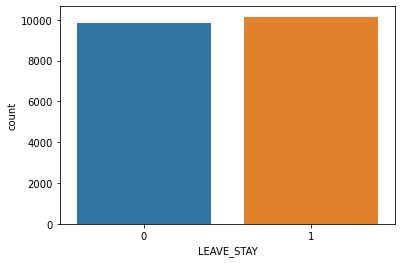

In [40]:
sns.countplot(data=df2, x='LEAVE_STAY')

In [41]:
features=df2.loc[:,df2.columns!='LEAVE_STAY']
features.head()

,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,COLLEGE_zero,REPORTED_SATISFACTION_sat,REPORTED_SATISFACTION_unsat,REPORTED_SATISFACTION_very_sat,REPORTED_SATISFACTION_very_unsat,REPORTED_USAGE_LEVEL_high,REPORTED_USAGE_LEVEL_little,REPORTED_USAGE_LEVEL_very_high,REPORTED_USAGE_LEVEL_very_little,CONSIDERING_CHANGE_OF_PLAN_considering,CONSIDERING_CHANGE_OF_PLAN_never_thought,CONSIDERING_CHANGE_OF_PLAN_no,CONSIDERING_CHANGE_OF_PLAN_perhaps
0,31953,0,6,313378,161,0,4,1,0,1,0,0,0,1,0,0,0,0,1,0
1,36147,0,13,800586,244,0,6,0,0,1,0,0,0,1,0,0,1,0,0,0
2,27273,230,0,305049,201,16,15,0,0,1,0,0,0,0,0,1,0,0,0,1
3,120070,38,33,788235,780,3,2,1,0,1,0,0,0,0,1,0,1,0,0,0
4,29215,208,85,224784,241,21,1,0,0,0,0,1,0,1,0,0,0,1,0,0


In [43]:
target=df2.loc[:,df2.columns=='LEAVE_STAY']

In [28]:
corr_matrix=df2.corr()

In [29]:
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

<ipython-input-29-8e01378157da>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_matrix, dtype=np.bool)


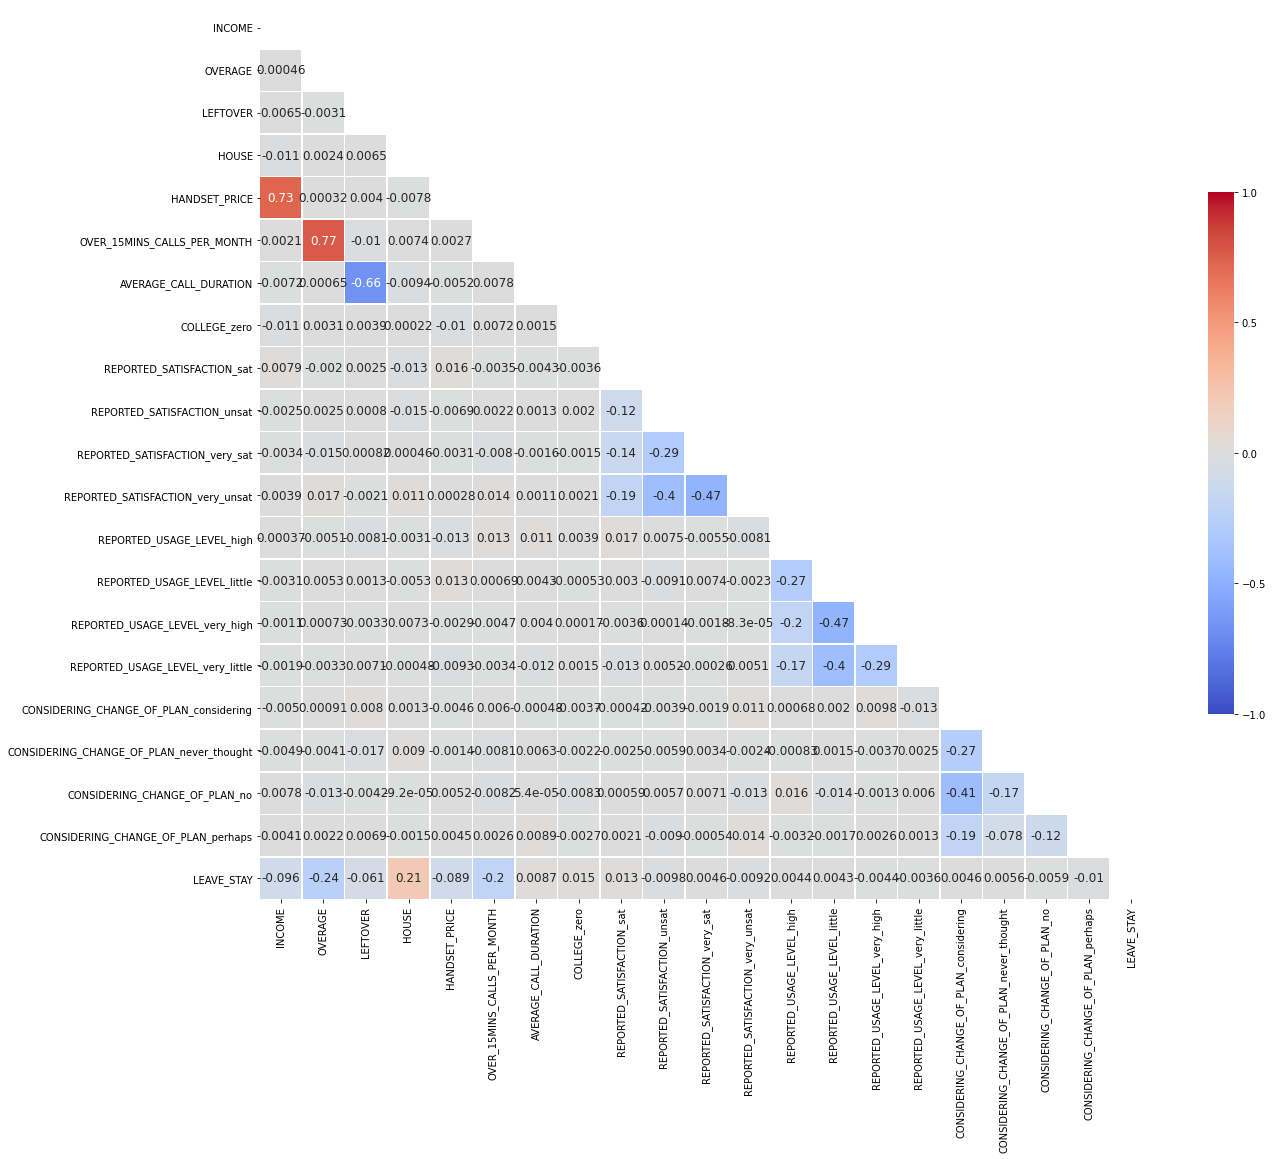

In [30]:
f, ax = plt.subplots(figsize=(20, 24)) 
heatmap = sns.heatmap(corr_matrix, 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [44]:
# antes de cualquier preprocesamiento divisimos los datos de entrenamiento y test.
X_train, X_test, y_train, y_test= train_test_split(
                            features,
                            target,
                            test_size=0.2,
                            shuffle=True,
                            random_state=0           
)

In [45]:
print(f'longitud de X_train: {len(X_train)}')
print(f'longitud de y_train: {len(y_train)}')
print(f'longitud de X_test: {len(X_test)}')
print(f'longitud de y_test: {len(y_test)}')

longitud de X_train: 16000
longitud de y_train: 16000
longitud de X_test: 4000
longitud de y_test: 4000


In [56]:
print(f'tipo  X_train: {type(X_train)}')
print(f'tipo y_train: {type(y_train)}')
print(f'tipo X_test: {type(X_test)}')
print(f'tipo  y_test: {type(y_test)}')

tipo  X_train: <class 'pandas.core.frame.DataFrame'>
tipo y_train: <class 'pandas.core.frame.DataFrame'>
tipo X_test: <class 'pandas.core.frame.DataFrame'>
tipo  y_test: <class 'pandas.core.frame.DataFrame'>


In [46]:
np.unique(y_test, return_counts=True)

(array([0, 1], dtype=uint8), array([1931, 2069], dtype=int64))


RandomForestClassifier



n_estimators: Número de árboles que va a tener el bosque, normalmente cuantos más mejor. Se recomienda usar 100

n_jobs: Número de cores que se pueden utilizar para entrenar un bosque. Cada árbol es independiente del resto

max_features: forma de garantizar que los árboles sean diferentes, todos se entrenan con una muestra aleatoria de los datos. Podemos hacer que distintos arboles utilicen distintos atributos
Regularización:
  max_depth:la profundidad máxima del árbol
  min_samples_split:número mínimo de muestras necesarias antes de dividir el nodo
  min_samples_leaf:número mínimo de muestras que debe haber en un nodo final (hoja)
  max_leaf_nodes:número máximo de nodos finales

Información: https://www.iartificial.net/random-forest-bosque-aleatorio/



In [59]:
# n_estimators
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)]

# max_features
max_features = ['auto', 'sqrt']

# max_depth
max_depth = [int(x) for x in np.linspace(20, 100, num = 5)]
max_depth.append(None)

# min_samples_split
min_samples_split = [2, 5, 10]

# min_samples_leaf
min_samples_leaf = [1, 2, 4]

# bootstrap
bootstrap = [True, False]

# Create the random grid
hyperparameters_tuning = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(hyperparameters_tuning)

{'n_estimators': [200, 400, 600, 800, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [20, 40, 60, 80, 100, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [62]:
%%time
# First create the base model to tune
rfc = RandomForestClassifier()

# Definition of the random search
random_search_cp = RandomizedSearchCV(estimator=rfc,
                                   param_distributions=hyperparameters_tuning,
                                   n_iter=10,
                                   scoring='accuracy',
                                   cv=5, 
                                   verbose=0)

# Fit the random search model
random_search_cp.fit(X_train,y_train.values.ravel())
print("Mejores hiperparametros:",random_search_cp.best_params_)
print("Accuracy hiperparametros:",random_search_cp.best_score_)

Mejores hiperparametros: {'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 60, 'bootstrap': True}
Accuracy hiperparametros: 0.701
Wall time: 6min 28s


In [70]:

# se entrena el modelo con los parametros encontrados en la busqueda aleatoria.
clf = RandomForestClassifier(n_estimators=400, min_samples_split=5,min_samples_leaf=4, max_features='sqrt', 
max_depth=60, bootstrap=True)
clf.fit(X_train, y_train.values.ravel())


RandomForestClassifier(max_depth=60, max_features='sqrt', min_samples_leaf=4,
                       min_samples_split=5, n_estimators=400)

In [71]:
clf_predict = clf.predict(X_test)

Text(39.453125, 0.5, 'Observed')

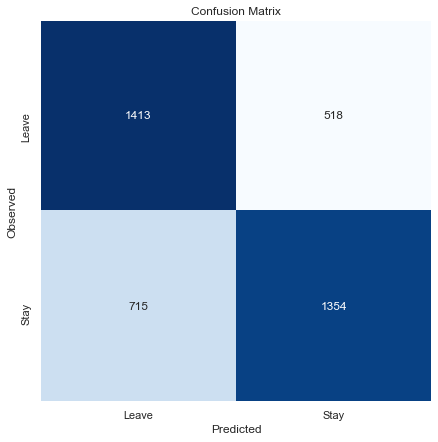

In [87]:
# Matrix de confunsión Corpus del contexto politico colombiano
sns.set(rc={'figure.figsize':(7,7)})
class_names=['Leave','Stay']
matrix=confusion_matrix(y_test, clf_predict)
# create dataframe
dataframe_graf=pd.DataFrame(matrix, index=class_names, columns=class_names)
# create headmap
sns.heatmap(dataframe_graf, annot=True, cbar=None, cmap="Blues",fmt='g')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Observed")

In [88]:
accuracy_randomforest=accuracy_score(y_test, clf_predict)
print(accuracy_randomforest)

0.69175


c:\Users\jeflores\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


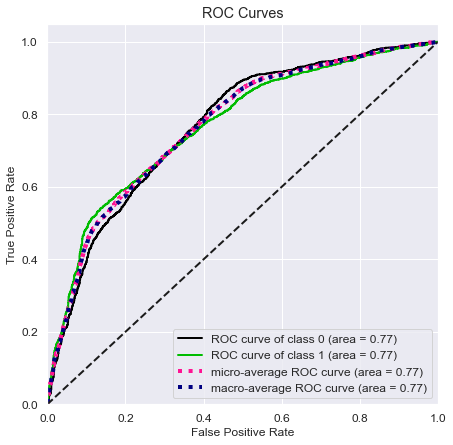

In [89]:
clf_predict_proba = clf.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, clf_predict_proba)
plt.show()


In [90]:
print(classification_report(y_test, clf_predict, target_names=class_names))

              precision    recall  f1-score   support

       Leave       0.66      0.73      0.70      1931
        Stay       0.72      0.65      0.69      2069

    accuracy                           0.69      4000
   macro avg       0.69      0.69      0.69      4000
weighted avg       0.69      0.69      0.69      4000



De 1.931 cientes que desertan (churn) el modelo logró identidicar correctamente 1.413. Recall=TP/(TP+FN)=(1413/1931)=0.73

De 2118 predicciones realizadas por el modelo para los clientes de desertan (churn) el modelo logró identidicar correctamente   1.413. Precision=TP/(TP+VN)=(1413)/(1413+715)=0.66

El modelo se considera un modelo bueno ya que es mejore que el baseline que esta en 0.50 